In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
import os
from matplotlib.patches import Rectangle
import glob
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [12]:
import sys
sys.path.append('/home/rfinn/github/Virgo/programs/')
import virgoCommon

Running on Rose's computer


In [2]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v1/'

In [3]:

plotdir = '/home/rfinn/research/Virgo/plots/'

### Read in tables

In [4]:
%run ~/github/Virgo/programs/readtables.py

In [5]:
len(v.ha)

6797

In [6]:
sum(v.main['HAobsflag'])

355

## Halpha Statistics

* update 2021-03-25 : after including Feb and May/June INT data, and NGC pointings from Becky

In [7]:
print('number observed in Halpha = ',sum(v.main['HAobsflag']))
print('number with Halpha SNR > 1 = ',sum(v.main['HAflag']))
print('number of CO sources observed in Halpha = ',sum(v.main['HAobsflag'] & v.main['COflag']))

number observed in Halpha =  355
number with Halpha SNR > 1 =  153
number of CO sources observed in Halpha =  143


# catalog statistics #

In [9]:
print('number with HL data = ',sum(v.main['HLflag']))
print('fraction with HL data = {:.3f}'.format(sum(v.main['HLflag'])/len(v.main)))

number with HL data =  6636
fraction with HL data = 0.976


In [34]:
radec = (v.main['RA'] > 192.) & (v.main['RA'] < 209) & (v.main['DEC']> 0.) & (v.main['DEC'] < 50.) 
radec_flag = radec & (v.main['DEC'] >(2*(v.main['RA'] - 205.) + 20) ) & (v.main['DEC'] < (2*(v.main['RA'] - 205.) + 55))
filament = radec_flag & (v.main['vr'] >2000.) & (v.main['vr'] < 3238.)

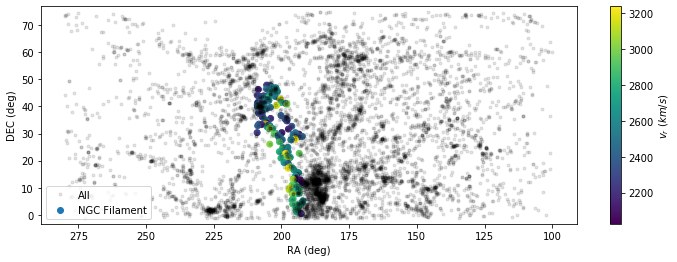

In [35]:
plt.figure(figsize=(12,4))
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='All')
plt.scatter(v.main['RA'][filament],v.main['DEC'][filament],c=v.main['vr'][filament],label='NGC Filament')
plt.gca().invert_xaxis()
plt.legend()
cb = plt.colorbar(label='$v_r \ (km/s)$')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
plt.axis('equal')
plt.savefig(plotdir+'vf_ngcfilament.png')

# Number of NGC Galaxies with Halpha Data#

In [36]:
ngchaflag = (v.ha['HAflag'] & filament)
print(sum(ngchaflag))

27


In [38]:
# number of CO galaxies with Halpha
nCO = sum(filament & v.main['COflag'])
nCO_ha = sum(ngchaflag & v.main['COflag'])
print('number of galaxies in the filament = ',sum(filament))
print('number of CO galaxies in the filament = ',nCO)
print('number of CO galaxies w/ha in the filament = ',nCO_ha)
print('percent of CO sources w/ha = {:.1f}'.format(nCO_ha/nCO*100))

number of galaxies in the filament =  259
number of CO galaxies in the filament =  44
number of CO galaxies w/ha in the filament =  19
percent of CO sources w/ha = 43.2


In [42]:
v.ha

VFID,RA,DEC,vr,radius,NEDname,prefix,HAflag,REDSHIFT,ZDIST,GAL_RA,GAL_DEC,ELLIP_RA,ELLIP_DEC,FILT_COR,R_FWHM,H_FWHM,POINTING,BBOX,FILTER_RATIO,GAL_XC,GAL_XC_ERR,GAL_YC,GAL_YC_ERR,GAL_MAG,GAL_MAG_ERR,GAL_RE,GAL_RE_ERR,GAL_N,GAL_N_ERR,GAL_BA,GAL_BA_ERR,GAL_PA,GAL_PA_ERR,GAL_SKY,GAL_CHISQ,GAL_SERSASYM [10],GAL_SERSASYM_ERR [10],GAL_SERSASYM_ERROR,GAL_SERSASYM_CHISQ,GAL_SERSASYM_RA,GAL_SERSASYM_DEC,ELLIP_XCENTROID,ELLIP_YCENTROID,ELLIP_EPS,ELLIP_THETA,ELLIP_GINI,ELLIP_GINI2,ELLIP_AREA,ELLIP_SUM,ELLIP_SUM_MAG,ELLIP_ASYM,ELLIP_ASYM_ERR,ELLIP_HSUM,ELLIP_HSUM_MAG,ELLIP_HASYM,ELLIP_HASYM_ERR,R_SKYNOISE,H_SKYNOISE,GAL_R24,GAL_R24_ERR,GAL_R25,GAL_R25_ERR,GAL_R26,GAL_R26_ERR,GAL_R_F25,GAL_R_F25_ERR,GAL_R24V,GAL_R24V_ERR,GAL_R25V,GAL_R25V_ERR,GAL_R_F50,GAL_R_F50_ERR,GAL_R_F75,GAL_R_F75_ERR,GAL_M24,GAL_M24_ERR,GAL_M25,GAL_M25_ERR,GAL_M26,GAL_M26_ERR,GAL_F_30R24,GAL_F_30R24_ERR,GAL_F_R24,GAL_F_R24_ERR,GAL_C30,GAL_C30_ERR,GAL_PETRO_R,GAL_PETRO_R_ERR,GAL_PETRO_FLUX,GAL_PETRO_FLUX_ERR,GAL_PETRO_R50,GAL_PETRO_R50_ERR,GAL_PETRO_R90,GAL_PETRO_R90_ERR,GAL_PETRO_CON,GAL_PETRO_CON_ERR,GAL_PETRO_MAG,GAL_PETRO_MAG_ERR,GAL_HR16,GAL_HR16_ERR,GAL_HR17,GAL_HR17_ERR,GAL_HR_F25,GAL_HR_F25_ERR,GAL_HR_F50,GAL_HR_F50_ERR,GAL_HR_F75,GAL_HR_F75_ERR,GAL_HM16,GAL_HM16_ERR,GAL_HM17,GAL_HM17_ERR,GAL_HF_30R24,GAL_HF_30R24_ERR,GAL_HF_R24,GAL_HF_R24_ERR,GAL_HC30,GAL_HC30_ERR,GAL_HR_F95R24,GAL_HR_F95R24_ERR,GAL_HF_TOT,GAL_HF_TOT_ERR,GAL_HPETRO_R,GAL_HPETRO_R_ERR,GAL_HPETRO_FLUX,GAL_HPETRO_FLUX_ERR,GAL_HPETRO_R50,GAL_HPETRO_R50_ERR,GAL_HPETRO_R90,GAL_HPETRO_R90_ERR,GAL_HPETRO_CON,GAL_HPETRO_CON_ERR,GAL_HPETRO_MAG,GAL_HPETRO_MAG_ERR,GAL_LOG_SFR_HA,GAL_LOG_SFR_HA_ERR,GAL_SSFR_IN,GAL_SSFR_IN_ERR,GAL_SSFR_OUT,GAL_SSFR_OUT_ERR,R24,R24_ERR,R25,R25_ERR,R26,R26_ERR,R_F25,R_F25_ERR,R24V,R24V_ERR,R25V,R25V_ERR,R_F50,R_F50_ERR,R_F75,R_F75_ERR,M24,M24_ERR,M25,M25_ERR,M26,M26_ERR,F_30R24,F_30R24_ERR,F_R24,F_R24_ERR,C30,C30_ERR,PETRO_R,PETRO_R_ERR,PETRO_FLUX,PETRO_FLUX_ERR,PETRO_R50,PETRO_R50_ERR,PETRO_R90,PETRO_R90_ERR,PETRO_CON,PETRO_CON_ERR,PETRO_MAG,PETRO_MAG_ERR,HR16,HR16_ERR,HR17,HR17_ERR,HR_F25,HR_F25_ERR,HR_F50,HR_F50_ERR,HR_F75,HR_F75_ERR,HM16,HM16_ERR,HM17,HM17_ERR,HF_30R24,HF_30R24_ERR,HF_R24,HF_R24_ERR,HC30,HC30_ERR,HR_F95R24,HR_F95R24_ERR,HF_TOT,HF_TOT_ERR,HPETRO_R,HPETRO_R_ERR,HPETRO_FLUX,HPETRO_FLUX_ERR,HPETRO_R50,HPETRO_R50_ERR,HPETRO_R90,HPETRO_R90_ERR,HPETRO_CON,HPETRO_CON_ERR,HPETRO_MAG,HPETRO_MAG_ERR,LOG_SFR_HA,LOG_SFR_HA_ERR,SSFR_IN,SSFR_IN_ERR,SSFR_OUT,SSFR_OUT_ERR,COMMENT,HAobsflag
bytes8,float64,float64,float32,float32,bytes30,bytes38,bool,float32,float32,float32,float32,float32,float32,float64,float32,float32,bytes10,bytes22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,fl

In [39]:
t = v.ha['VFID','NSAIDV0','Date Obs','Pointing','Date Obs2','Telescope'][ngchaflag]
t.write('/home/rfinn/research/Virgo/Halpha/ngcfilament_halpha.fits',format='fits')

KeyError: 'NSAIDV0'

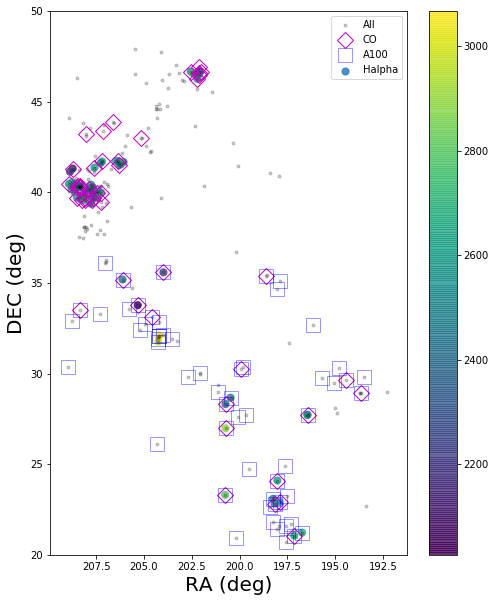

In [107]:
plt.figure(figsize=(8,10))
plt.plot(maintab['RA'][filament],maintab['DEC'][filament],'k.',alpha=.2,label='All')
plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
# plot CO sources
flag = filament & maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
flag = filament & maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
cb = plt.colorbar()
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament.png')

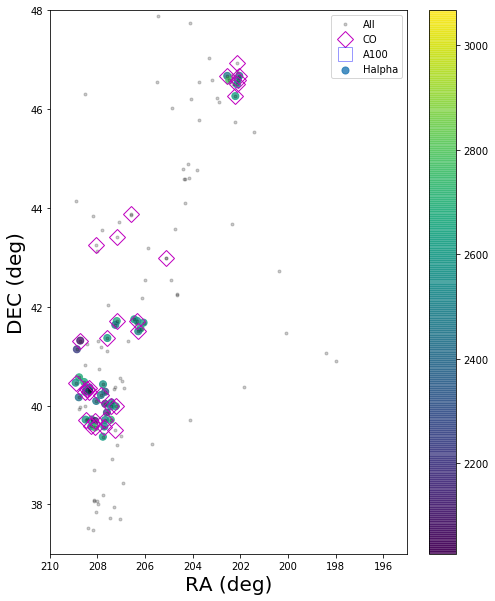

In [108]:
plt.figure(figsize=(8,10))
plt.plot(maintab['RA'][filament],maintab['DEC'][filament],'k.',alpha=.2,label='All')
plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
# plot CO sources
flag = filament & maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
flag = filament & maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
cb = plt.colorbar()
plt.legend()#label='vr (km/s)')

plt.axis([195,210,37,48])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCgroup.png')

# Identifying Filament Galaxies using Supergalactic Coordinates #

- We have a new table from Gianluca that includes SGX, SGY, SGZ coordinates for each galaxy.
- We can use the information in Kim+2016 paper to identify NGC filament galaxies based on SG coordinates.
- Compare this to selecting NGC filament galaxies based on RA, DEC, and vr.
- table is called: vf_north_v0_main_env_prop_H0_74_0.fits
- According to Kim+2016, the NGC filament is located between

| SG Coord | Min | Max |
|----------|-----|-----|
| SGX | -16.04 | 4.23 |
| SGY | 21.71| 26.53 |
| SGZ | -1.19 | 8.92 |

In [116]:
envtab = Table.read(tabledir+'vf_north_v0_main_env_prop_H0_74_0.fits')

In [129]:
xflag = (envtab['SGX'] > -16.04) & (envtab['SGX'] < 4.23) 
yflag = (envtab['SGY'] > 21.71) & (envtab['SGY'] < 26.53) 
zflag = (envtab['SGZ'] > -1.19) & (envtab['SGZ'] < 8.92) 
filament2 = xflag & yflag & zflag

In [133]:
print('number of galaxies in the filament = ',sum(filament2))
print('number of NGC galaxies w/CO = ',sum(filament2 & maintab['COflag']))
print('number of NGC galaxies w/Halpha = ',sum(filament2 & hatab['haflag']))

number of galaxies in the filament =  125
number of NGC galaxies w/CO =  1
number of NGC galaxies w/Halpha =  0


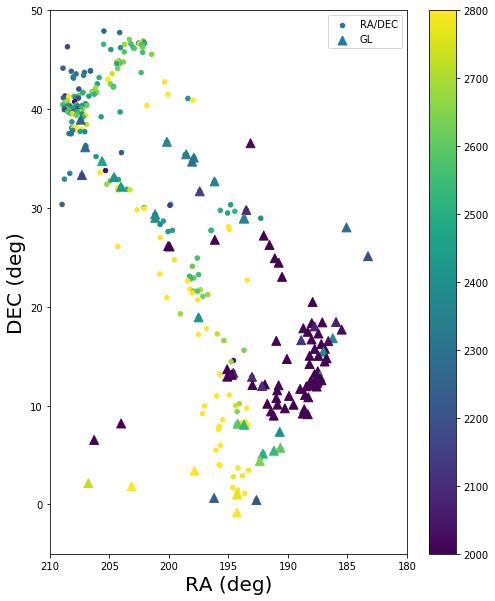

In [157]:
plt.figure(figsize=(8,10))
plt.scatter(maintab['RA'][filament],maintab['DEC'][filament],c=maintab['vr'][filament],s=20,vmin=2000,vmax=2800,label='RA/DEC')
plt.scatter(maintab['RA'][filament2],maintab['DEC'][filament2],c=maintab['vr'][filament2],marker='^',s=80,vmin=2000,vmax=2800,label='GL')
#plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
## plot CO sources
#flag = filament & maintab['COflag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
#flag = filament & maintab['A100flag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
plt.legend()
cb = plt.colorbar()
#plt.legend()#label='vr (km/s)')
plt.axis([180,210,-5,50])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
#plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament-GLcomparison.png')

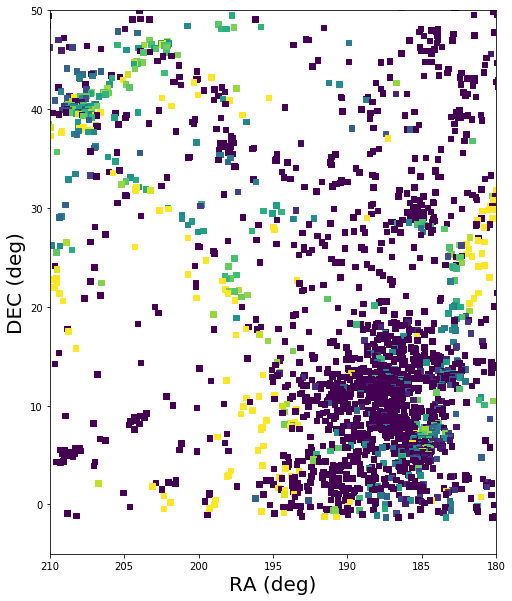

In [146]:
plt.figure(figsize=(8,10))
plt.scatter(maintab['RA'],maintab['DEC'],c=maintab['vr'],marker='s',s=30,vmin=2000,vmax=2800)
#plt.scatter(maintab['RA'][filament2],maintab['DEC'][filament2],c=maintab['vr'][filament2],vmin=2000,vmax=2800)
#plt.scatter(maintab['RA'][ngchaflag],maintab['DEC'][ngchaflag],c=maintab['vr'][ngchaflag],s=50,alpha=.8,label='Halpha')
## plot CO sources
#flag = filament & maintab['COflag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=12,mfc='None',alpha=1,label='CO')
#flag = filament & maintab['A100flag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bs',markersize=14,mfc='None',alpha=.4,label='A100')
#cb = plt.colorbar()
#plt.legend()#label='vr (km/s)')
plt.axis([180,210,-5,50])
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
#plt.ylim(20,50)
plt.savefig('/home/rfinn/research/Virgo/plots/NGCfilament-GLcomparison.png')

# Size measure to pass into legacy survey photometry#



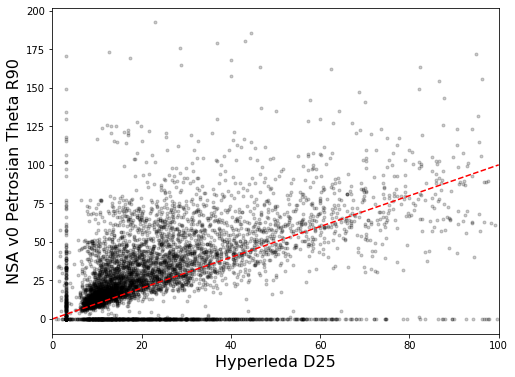

In [221]:
plt.figure(figsize=(8,6))
x = 10**(hltab['logd25']-1)*60/2 # convert from 0.1 arcmin to arcsec
y = nsa0tab['PETROTH90']*1.3
plt.plot(x,y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v0 Petrosian Theta R90',fontsize=16)
plt.xlim(0,100)
x1,x2 = plt.xlim()
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')


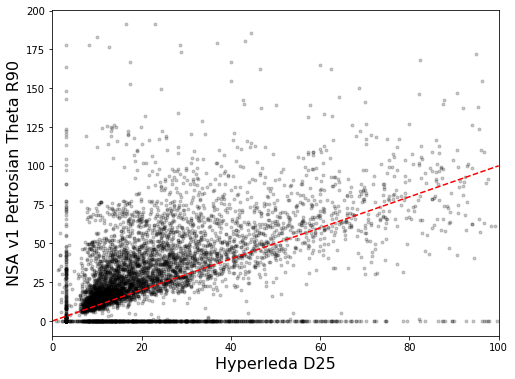

In [227]:
plt.figure(figsize=(8,6))
x = 10**(hltab['logd25']-1)*60/2 # convert from 0.1 arcmin to arcsec
y = nsatab['PETRO_TH90']*1.3
plt.plot(x,y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v1 Petrosian Theta R90',fontsize=16)
plt.xlim(0,100)
x1,x2 = plt.xlim()
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')

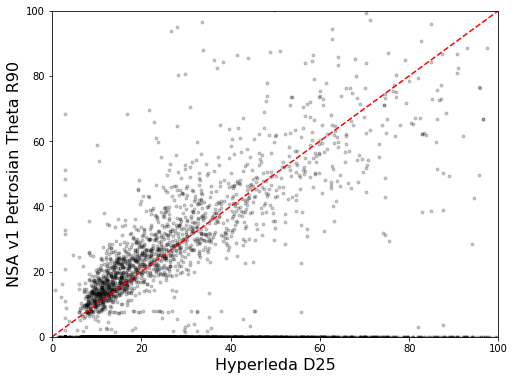

In [226]:
plt.figure(figsize=(8,6))
x = 10**(hltab['logd25']-1)*60/2 # convert from 0.1 arcmin to arcsec
y = a100sdsstab['petroR90_r']*1.4
plt.plot(x,y,'k.',alpha=.2)
plt.xlabel('Hyperleda D25',fontsize=16)
plt.ylabel('NSA v1 Petrosian Theta R90',fontsize=16)
plt.xlim(0,100)
x1,x2 = plt.xlim()
plt.ylim(x1,x2)
xl = np.linspace(x1,x2,100)
plt.plot(xl,xl,'r--')

In [179]:
# select galaxies with a valid D25
d25_flag = hltab['e_logd25'] != 0
no_radius_flag = ~d25_flag & ~maintab['NSAV0flag']
print(sum(no_radius_flag))

49


In [180]:
sum(maintab['NSAflag'][no_radius_flag])

39

In [181]:
a100_only = maintab['A100flag'] & ~maintab['HLflag'] & ~maintab['NSAflag'] & ~maintab['NSAV0flag']
sum(a100_only)

9

Make a size array that  uses
- logD25 if it exists
- size from NSA V0, if it exists
- size from NSA V1, if it exists
- size from A100 sdss catalog (petroR90_r)

We expect 1 galaxy to have no size estimate 
- identify this galaxy
- print its RA, DEC
- look it up in the legacy viewer or sdss finding chart tool

# Displaying Cutout Images #

In [11]:
r = fits.getdata('/home/rfinn/research/Virgo/gui-test2/v17-VFID2145-R.fits')
ha = fits.getdata('/home/rfinn/research/Virgo/gui-test2/v17-VFID2145-CS.fits')

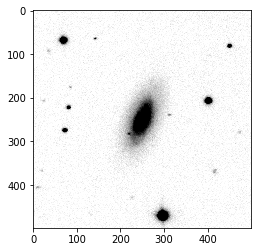

In [10]:
plt.figure()
plt.imshow(r,vmin=0,vmax=3,cmap='gray_r')

# Creating Image of the Specific SFR #

In [16]:
ssfr = ha/(.0425*r)

[150, 350, 150, 350]

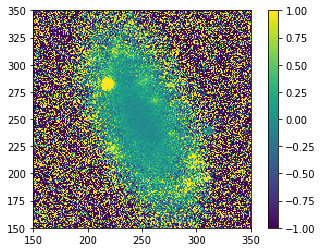

In [24]:
plt.figure()
plt.imshow(ssfr,vmin=-1,vmax=1)
plt.colorbar()
plt.axis([150,350,150,350])

Illustrate each stage of analysis

# Compare my R mag and NSA mag

In [6]:
os.chdir(plotdir)
%run ~/github/Virgo/programs/readtables.py

In [9]:
v.ha

VFID,RA,DEC,vr,radius,NEDname,prefix,HAflag,REDSHIFT,ZDIST,GAL_RA,GAL_DEC,ELLIP_RA,ELLIP_DEC,FILT_COR,R_FWHM,H_FWHM,POINTING,BBOX,FILTER_RATIO,GAL_XC,GAL_XC_ERR,GAL_YC,GAL_YC_ERR,GAL_MAG,GAL_MAG_ERR,GAL_RE,GAL_RE_ERR,GAL_N,GAL_N_ERR,GAL_BA,GAL_BA_ERR,GAL_PA,GAL_PA_ERR,GAL_SKY,GAL_CHISQ,GAL_SERSASYM [10],GAL_SERSASYM_ERR [10],GAL_SERSASYM_ERROR,GAL_SERSASYM_CHISQ,GAL_SERSASYM_RA,GAL_SERSASYM_DEC,ELLIP_XCENTROID,ELLIP_YCENTROID,ELLIP_EPS,ELLIP_THETA,ELLIP_GINI,ELLIP_GINI2,ELLIP_AREA,ELLIP_SUM,ELLIP_SUM_MAG,ELLIP_ASYM,ELLIP_ASYM_ERR,ELLIP_HSUM,ELLIP_HSUM_MAG,ELLIP_HASYM,ELLIP_HASYM_ERR,R_SKYNOISE,H_SKYNOISE,GAL_R24,GAL_R24_ERR,GAL_R25,GAL_R25_ERR,GAL_R26,GAL_R26_ERR,GAL_R_F25,GAL_R_F25_ERR,GAL_R24V,GAL_R24V_ERR,GAL_R25V,GAL_R25V_ERR,GAL_R_F50,GAL_R_F50_ERR,GAL_R_F75,GAL_R_F75_ERR,GAL_M24,GAL_M24_ERR,GAL_M25,GAL_M25_ERR,GAL_M26,GAL_M26_ERR,GAL_F_30R24,GAL_F_30R24_ERR,GAL_F_R24,GAL_F_R24_ERR,GAL_C30,GAL_C30_ERR,GAL_PETRO_R,GAL_PETRO_R_ERR,GAL_PETRO_FLUX,GAL_PETRO_FLUX_ERR,GAL_PETRO_R50,GAL_PETRO_R50_ERR,GAL_PETRO_R90,GAL_PETRO_R90_ERR,GAL_PETRO_CON,GAL_PETRO_CON_ERR,GAL_PETRO_MAG,GAL_PETRO_MAG_ERR,GAL_HR16,GAL_HR16_ERR,GAL_HR17,GAL_HR17_ERR,GAL_HR_F25,GAL_HR_F25_ERR,GAL_HR_F50,GAL_HR_F50_ERR,GAL_HR_F75,GAL_HR_F75_ERR,GAL_HM16,GAL_HM16_ERR,GAL_HM17,GAL_HM17_ERR,GAL_HF_30R24,GAL_HF_30R24_ERR,GAL_HF_R24,GAL_HF_R24_ERR,GAL_HC30,GAL_HC30_ERR,GAL_HR_F95R24,GAL_HR_F95R24_ERR,GAL_HF_TOT,GAL_HF_TOT_ERR,GAL_HPETRO_R,GAL_HPETRO_R_ERR,GAL_HPETRO_FLUX,GAL_HPETRO_FLUX_ERR,GAL_HPETRO_R50,GAL_HPETRO_R50_ERR,GAL_HPETRO_R90,GAL_HPETRO_R90_ERR,GAL_HPETRO_CON,GAL_HPETRO_CON_ERR,GAL_HPETRO_MAG,GAL_HPETRO_MAG_ERR,GAL_LOG_SFR_HA,GAL_LOG_SFR_HA_ERR,GAL_SSFR_IN,GAL_SSFR_IN_ERR,GAL_SSFR_OUT,GAL_SSFR_OUT_ERR,R24,R24_ERR,R25,R25_ERR,R26,R26_ERR,R_F25,R_F25_ERR,R24V,R24V_ERR,R25V,R25V_ERR,R_F50,R_F50_ERR,R_F75,R_F75_ERR,M24,M24_ERR,M25,M25_ERR,M26,M26_ERR,F_30R24,F_30R24_ERR,F_R24,F_R24_ERR,C30,C30_ERR,PETRO_R,PETRO_R_ERR,PETRO_FLUX,PETRO_FLUX_ERR,PETRO_R50,PETRO_R50_ERR,PETRO_R90,PETRO_R90_ERR,PETRO_CON,PETRO_CON_ERR,PETRO_MAG,PETRO_MAG_ERR,HR16,HR16_ERR,HR17,HR17_ERR,HR_F25,HR_F25_ERR,HR_F50,HR_F50_ERR,HR_F75,HR_F75_ERR,HM16,HM16_ERR,HM17,HM17_ERR,HF_30R24,HF_30R24_ERR,HF_R24,HF_R24_ERR,HC30,HC30_ERR,HR_F95R24,HR_F95R24_ERR,HF_TOT,HF_TOT_ERR,HPETRO_R,HPETRO_R_ERR,HPETRO_FLUX,HPETRO_FLUX_ERR,HPETRO_R50,HPETRO_R50_ERR,HPETRO_R90,HPETRO_R90_ERR,HPETRO_CON,HPETRO_CON_ERR,HPETRO_MAG,HPETRO_MAG_ERR,LOG_SFR_HA,LOG_SFR_HA_ERR,SSFR_IN,SSFR_IN_ERR,SSFR_OUT,SSFR_OUT_ERR,COMMENT,HAobsflag
bytes8,float64,float64,float32,float32,bytes30,bytes38,bool,float32,float32,float32,float32,float32,float32,float64,float32,float32,bytes10,bytes22,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,fl

In [11]:
v.nsav0

VFID,RA_1,DEC_1,NEDname,IAUNAME,SUBDIR,RA_2,DEC_2,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,ZLG,ZDIST,ZDIST_ERR,NSAID,NMGY [7],NMGY_IVAR [7],OK,RNMGY [7],ABSMAG [7],AMIVAR [7],EXTINCTION [7],KCORRECT [7],KCOEFF [5],MTOL [7],B300,B1000,METS,MASS,XCEN,YCEN,NPROF [7],"PROFMEAN [15,7]","PROFMEAN_IVAR [15,7]","QSTOKES [15,7]","USTOKES [15,7]","BASTOKES [15,7]","PHISTOKES [15,7]",PETROFLUX [7],PETROFLUX_IVAR [7],FIBERFLUX [7],FIBERFLUX_IVAR [7],BA50,PHI50,BA90,PHI90,SERSICFLUX [7],SERSICFLUX_IVAR [7],SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY [7],CLUMPY [7],DFLAGS [7],AID,PID,DVERSION,PROFTHETA [15],PETROTHETA,PETROTH50,PETROTH90,SERSIC_TH50,OBJNO,PLATE,FIBERID,MJD,COEFF [7],VDISP,D4000,D4000ERR,FA,FAERR,S2FLUX,S2FLUXERR,S2EW,S2EWERR,S2VMEAS,S2VMERR,S2RATIO,HAFLUX,HAFLUXERR,HAEW,HAEWERR,HAVMEAS,HAVMERR,N2FLUX,N2FLUXERR,N2EW,N2EWERR,N2VMEAS,N2VMERR,HBFLUX,HBFLUXERR,HBEW,HBEWERR,HBVMEAS,HBVMERR,O1FLUX,O1FLUXERR,O1EW,O1EWERR,O1VMEAS,O1VMERR,O2FLUX,O2FLUXERR,O2EW,O2EWERR,O2VMEAS,O2VMERR,O3FLUX,O3FLUXERR,O3EW,O3EWERR,O3VMEAS,O3VMERR,AHGEW,AHGEWERR,AHDEW,AHDEWERR,NE3EW,NE3EWERR,NE5EW,NE5EWERR,AV,S2NSAMP,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,NSA0flag
bytes8,float64,float64,bytes30,bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,float32,float32,float32,int32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,bytes8,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,bytes6,bytes23,bytes8,int32,float64,float64,bool
VFID0000,185.86877249999998,74.9522485,NGC 4363,,,0.0,0.0,0,0,0,0,0,0,0.0,0.0,,0.0,0,0,0,,0.0,0.0,0.0,0.0,0.0,0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0,0,,0.0 .. 0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,0,0.0,0.0,False
VFID0001,182.208,74.9042778,NGC 4133,,,0.0,0.0,0,0,0,0,0,0,0.0,0.0,,0.0,0,0,0,,0.0,0.0,0.0,0.0,0.0,0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0.0,0.0,0.0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0,0,,0.0 .. 0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0 .. 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,0,0.0,0.0,False
VFID0002,145.944663,74.8595778,NGC 2977,,,0.0,0.0,0,0,0,0,0,0,0.0,0.0,,0.0,0,0,0,,0.0,0.0,0.0,0.0,0.0,0,0.0 .. 0.0,0.0 .. 0.0,0,0.0 .

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


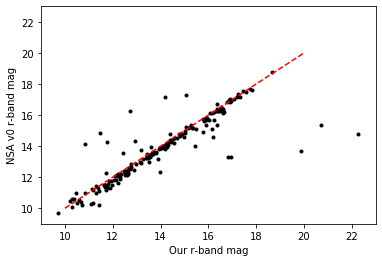

In [20]:
plt.figure()
nsamag = 22.5 - 2.5*np.log10(v.nsav0['NMGY'][:,4])
plt.plot(v.ha['GAL_MAG'],nsamag,'k.')
plt.axis([9,23,9,23])
plt.xlabel('Our r-band mag')
plt.ylabel('NSA v0 r-band mag')
xl = np.linspace(10,20,100)
plt.plot(xl,xl,'r--')

# Positions of Halpha Sources

In [10]:
def plot_spines():
    sfiles = glob.glob(homedir+'/research/Virgo/tables-north/spines/filament*.fits')
    ncolor = 0
    for i,f in enumerate(sfiles):
        spine  = Table.read(f)
        plt.plot(spine['ra'],spine['dec'],c=mycolors[ncolor],label=os.path.basename(f).replace('filament_spine_','').replace('.fits','').replace('_Filament',''),lw=3)
        ncolor += 1
        if ncolor > len(mycolors)-1:
            ncolor = 0

Text(0.5, 1.0, 'Filamentary Structures Surrounding the Virgo Cluster')

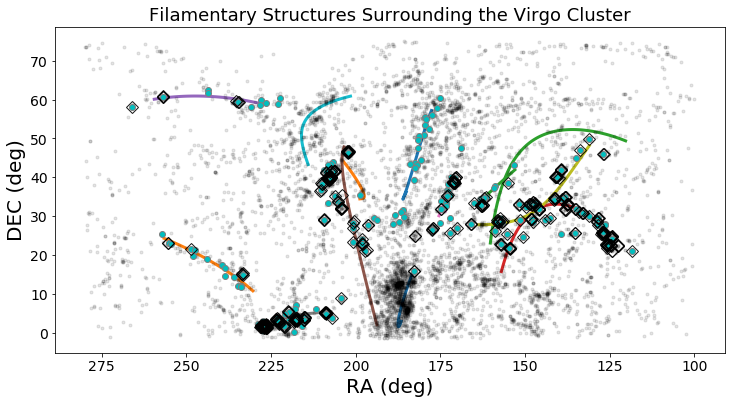

In [96]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=6,alpha=1,label='CO',mec='0.5')
flag = v.main['HAobsflag']
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kD',alpha=.9,mfc='None',markersize=9,label='Halpha')


# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
#plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(loc='upper right')
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)


# Calculate the Fraction of Galaxies Observed in Each Filament

In [23]:
for f in virgoCommon.filaments:
    filmemb = (v.fil['filament'] == f) & (v.fil['filament_member'])
    nmemb = sum(filmemb)
    
    filmembco = filmemb & v.main['COflag']
    filmembcoha = filmembco & v.main['HAobsflag']
    nco = sum(filmembco)
    ncoha = sum(filmembcoha)
    frac_co_with_ha = ncoha/nco
    
    filmembha = filmemb & v.main['HAobsflag']
    nha = sum(filmembha)
    frac_filmemb_with_ha = nha/nmemb
    
    
    print('######### {}  ##########'.format(f))
    print('Number of members={:.0f}, CO={:.0f}, Halpha={:.0f}'.format(nmemb,nco,nha))
    print('Percent of members with Halpha = {:.1f} ({}/{})'.format(100*frac_filmemb_with_ha,nha,nmemb))
    print('Percent of CO members with Halpha = {:.1f} ({}/{})'.format(100*frac_co_with_ha,ncoha,nco))
    print("")
    

    

######### LeoII_A_Filament  ##########
Number of members=145, CO=16, Halpha=43
Percent of members with Halpha = 29.7 (43/145)
Percent of CO members with Halpha = 93.8 (15/16)

######### LeoII_B_Filament  ##########
Number of members=63, CO=12, Halpha=20
Percent of members with Halpha = 31.7 (20/63)
Percent of CO members with Halpha = 100.0 (12/12)



/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


######### Leo_Minor_Filament  ##########
Number of members=125, CO=0, Halpha=1
Percent of members with Halpha = 0.8 (1/125)
Percent of CO members with Halpha = nan (0/0)

######### VirgoIII_Filament  ##########
Number of members=206, CO=36, Halpha=70
Percent of members with Halpha = 34.0 (70/206)
Percent of CO members with Halpha = 63.9 (23/36)

######### NGC5353_4_Filament  ##########
Number of members=133, CO=18, Halpha=26
Percent of members with Halpha = 19.5 (26/133)
Percent of CO members with Halpha = 72.2 (13/18)

######### Virgo_Draco_Filament  ##########
Number of members=48, CO=9, Halpha=5
Percent of members with Halpha = 10.4 (5/48)
Percent of CO members with Halpha = 33.3 (3/9)

######### Virgo_Serpens_Filament  ##########
Number of members=65, CO=10, Halpha=5
Percent of members with Halpha = 7.7 (5/65)
Percent of CO members with Halpha = 30.0 (3/10)

######### Virgo_Coma_Berenices_Filament  ##########
Number of members=105, CO=15, Halpha=19
Percent of members with Halpha = 

In [25]:
filmemb = (~v.fil['filament_member'])
nmemb = sum(filmemb)
    
filmembco = filmemb & v.main['COflag']
filmembcoha = filmembco & v.main['HAobsflag']
nco = sum(filmembco)
ncoha = sum(filmembcoha)
frac_co_with_ha = ncoha/nco
    
filmembha = filmemb & v.main['HAobsflag']
nha = sum(filmembha)
frac_filmemb_with_ha = nha/nmemb
    
    
print('######### NON FILAMENT GALAXIES  ##########'.format(f))
print('Number of members={:.0f}, CO={:.0f}, Halpha={:.0f}'.format(nmemb,nco,nha))
print('Percent of members with Halpha = {:.1f} ({}/{})'.format(100*frac_filmemb_with_ha,nha,nmemb))
print('Percent of CO members with Halpha = {:.1f} ({}/{})'.format(100*frac_co_with_ha,ncoha,nco))
print("")

######### NON FILAMENT GALAXIES  ##########
Number of members=4672, CO=93, Halpha=157
Percent of members with Halpha = 3.4 (157/4672)
Percent of CO members with Halpha = 64.5 (60/93)



In [30]:
print(sum( v.fil['filament_member']))
print(sum(v.main['COflag'] & v.fil['filament_member']))
print(sum(v.main['COflag'] & v.fil['filament_member'] & v.main['HAobsflag']))
print(sum(v.fil['filament_member'] & v.main['HAobsflag']))

2125
149
83
198


In [31]:
198/2125

0.09317647058823529

In [32]:
83/149


0.5570469798657718

# Halpha Targets in z0MGS

In [76]:
print(sum(v.main['HAobsflag'] ))
print(sum(v.main['HAobsflag'] & v.main['Z0MGSflag'] ))
print(sum(v.main['HAobsflag'] & v.main['Z0MGSflag'] &v.main['COflag'] ))
print(sum(v.main['HAobsflag']  &v.main['COflag'] ))

355
184
137
143


# Compare SFR z0MGS with our SFR

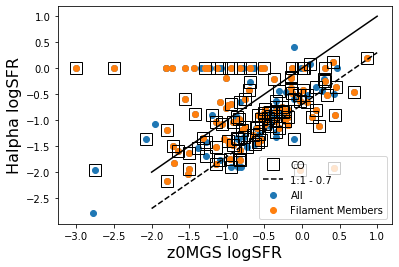

In [75]:
x = v.z0mgs['logsfr']
y = v.ha['LOG_SFR_HA']
flag = v.main['HAobsflag']
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.fil['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ks',marker='s',mfc='None',markersize=12,label='CO')
xline = np.linspace(-2,1,100)
plt.plot(xline,xline,'k-')
plt.plot(xline,xline-.7,'k--',label='1:1 - 0.7')
plt.xlabel('z0MGS logSFR',fontsize=16)
plt.ylabel('Halpha logSFR',fontsize=16)
plt.legend()


In [69]:
def get_BV_MS(logMstar):
    ''' get MS fit that BV calculated from GSWLC '''
    return 0.53*logMstar-5.5

def plot_BV_MS(ax,color='mediumblue',ls='-'):
    plt.sca(ax)
    
    x1,x2 = 8.5,11.15
    xline = np.linspace(x1,x2,100)
    yline = get_BV_MS(xline)
    ax.plot(xline,yline,c='w',ls=ls,lw=4,label='_nolegend_')
    ax.plot(xline,yline,c=color,ls=ls,lw=3,label='Linear Fit')

    # scatter around MS fit
    sigma=0.3
    ax.plot(xline,yline-1.5*sigma,c='w',ls='--',lw=4)
    ax.plot(xline,yline-1.5*sigma,c=color,ls='--',lw=3,label='fit-1.5$\sigma$')

def plot_GSWLC_sssfr(ax=None,ls='-'):
    if ax is None:
        ax = plt.gca()

    ssfr = -11.5
    x1,x2 = 9.6,11.15
    xline = np.linspace(x1,x2,100)
    yline = ssfr+xline
    ax.plot(xline,yline,c='w',ls=ls,lw=4,label='_nolegend_')
    ax.plot(xline,yline,c='0.5',ls=ls,lw=3,label='log(sSFR)=-11.5')
    

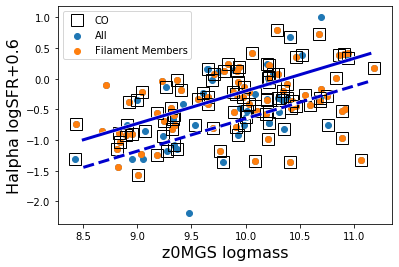

In [94]:
# SF MS
x = v.z0mgs['logmass']
y = v.ha['LOG_SFR_HA']+.6
flag = v.main['HAobsflag'] & (v.ha['GAL_HF_TOT'] > 0)
plt.figure()
plt.scatter(x[flag],y[flag],label='All')
flag2 = flag & v.fil['filament_member']
plt.scatter(x[flag2],y[flag2],label='Filament Members')
flag2 = flag & v.main['COflag']
plt.plot(x[flag2],y[flag2],'ks',marker='s',mfc='None',markersize=12,label='CO')
#xline = np.linspace(8,11,100)
#plt.plot(xline,xline,'k-')
#plt.plot(xline,xline-.5,'k--',label='1:1 - 0.5')
plt.xlabel('z0MGS logmass',fontsize=16)
plt.ylabel('Halpha logSFR+0.6',fontsize=16)
plt.legend()
plot_BV_MS(plt.gca())



# Morphologies

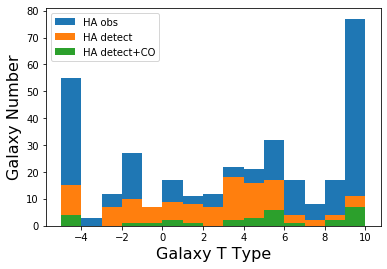

In [90]:
plt.figure()

x = v.hl['t']

# plot histogram of T type, with and without z0mgs
mybins = np.arange(-5,11)
flag1 = v.main['HAobsflag'] #& ~v.main['COflag'] & (v.ha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA obs')
flag1 = v.main['HAobsflag']  & (v.ha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA detect')
flag1 = v.main['HAobsflag'] & ~v.main['COflag'] & (v.ha['GAL_HF_TOT'] > 0)
t = plt.hist(x[flag1],bins=mybins,label='HA detect+CO')
plt.xlabel('Galaxy T Type',fontsize=16)
plt.ylabel('Galaxy Number',fontsize=16)
plt.legend()

In [82]:
v.ha.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'NEDname',
 'prefix',
 'HAflag',
 'REDSHIFT',
 'ZDIST',
 'GAL_RA',
 'GAL_DEC',
 'ELLIP_RA',
 'ELLIP_DEC',
 'FILT_COR',
 'R_FWHM',
 'H_FWHM',
 'POINTING',
 'BBOX',
 'FILTER_RATIO',
 'GAL_XC',
 'GAL_XC_ERR',
 'GAL_YC',
 'GAL_YC_ERR',
 'GAL_MAG',
 'GAL_MAG_ERR',
 'GAL_RE',
 'GAL_RE_ERR',
 'GAL_N',
 'GAL_N_ERR',
 'GAL_BA',
 'GAL_BA_ERR',
 'GAL_PA',
 'GAL_PA_ERR',
 'GAL_SKY',
 'GAL_CHISQ',
 'GAL_SERSASYM',
 'GAL_SERSASYM_ERR',
 'GAL_SERSASYM_ERROR',
 'GAL_SERSASYM_CHISQ',
 'GAL_SERSASYM_RA',
 'GAL_SERSASYM_DEC',
 'ELLIP_XCENTROID',
 'ELLIP_YCENTROID',
 'ELLIP_EPS',
 'ELLIP_THETA',
 'ELLIP_GINI',
 'ELLIP_GINI2',
 'ELLIP_AREA',
 'ELLIP_SUM',
 'ELLIP_SUM_MAG',
 'ELLIP_ASYM',
 'ELLIP_ASYM_ERR',
 'ELLIP_HSUM',
 'ELLIP_HSUM_MAG',
 'ELLIP_HASYM',
 'ELLIP_HASYM_ERR',
 'R_SKYNOISE',
 'H_SKYNOISE',
 'GAL_R24',
 'GAL_R24_ERR',
 'GAL_R25',
 'GAL_R25_ERR',
 'GAL_R26',
 'GAL_R26_ERR',
 'GAL_R_F25',
 'GAL_R_F25_ERR',
 'GAL_R24V',
 'GAL_R24V_ERR',
 'GAL_R25V',
 'G

# Locations of Halpha Imagine with Centers of Meerkat Pointings

From overleaf document (https://www.overleaf.com/project/5f19a5da130bb10001829a38)

```
 Field & RA (J2000) h:m:s  & Dec (J2000) d:m:s   \\ 
 1                 & 15 06 19.92 & 01 51 00.00 \\ 
 
 2                 & 15 00 48.00 & 01 57 00.00  \\

 3                 & 14 20 38.64 & 03 36 36.00  \\

 4                 & 13 55 47.52 & 05 12 00.00  \\ 

```


In [97]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [200]:
m1 = SkyCoord('15 06 19.92 +01 51 00.00',unit=(u.hourangle,u.deg))
m2 = SkyCoord('15 00 48.00 +01 57 00.00',unit=(u.hourangle,u.deg))
m3 = SkyCoord('14 20 38.64 +03 36 36.00',unit=(u.hourangle,u.deg))
m4 = SkyCoord('13 55 47.52 +05 12 00.00',unit=(u.hourangle,u.deg))
meerkat = [m1,m2,m3,m4]
# from Pascale's email on 3/27
field1 = SkyCoord('208.8 5.2',unit=(u.deg,u.deg),frame='icrs')
field2 = SkyCoord('215.16 3.6',unit=(u.deg,u.deg),frame='icrs')
field3b = SkyCoord('225.23 1.87',unit=(u.deg,u.deg),frame='icrs')
field4 = SkyCoord('226.6 1.85',unit=(u.deg,u.deg),frame='icrs')
meerkat = [field1,field2,field3b,field4]
titles = ['Field_1','Field_2','Field_3b','Field_4']

In [190]:
plt.figure(figsize=(12,3))
ax = plt.gca()
for m in meerkat:
    circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='g',alpha=.5,label='Meerkat' )
    ax.add_artist(circ)
    
flag = (v.fil['filament'] == 'VirgoIII_Filament') #& (v.fil['filament_member'])
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='.5',alpha=.2)

#A100 sources
flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['A100flag'])
plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],color=v.a100['HIdef']

SyntaxError: unexpected EOF while parsing (<ipython-input-190-baaa839076f4>, line 12)

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


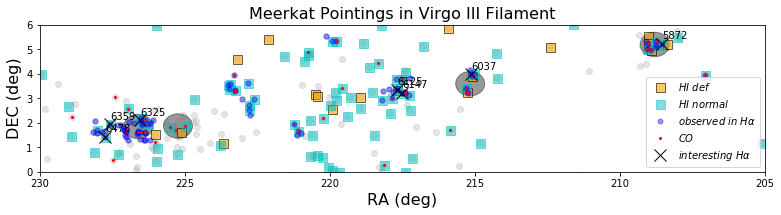

In [224]:
plt.figure(figsize=(13,3))
plt.subplots_adjust(bottom=.2)
ax = plt.gca()
for m in meerkat:
    circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='k',alpha=.4,label='Meerkat' )
    ax.add_artist(circ)
    
#HIdef_flag = v.a100['HIdef_bos'] > 0.5
HIdef_flag = v.a100['HIdef_bytype'] > 0.5
flag = (v.fil['filament'] == 'VirgoIII_Filament') #& (v.fil['filament_member'])
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='.5',alpha=.2)

#A100 sources, HI def
flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['A100flag']) & HIdef_flag
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ks',color='orange',mec='k',alpha=.6,markersize=9,label=r'$HI \ def$')
#A100 sources, HI normal
flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['A100flag']) & ~HIdef_flag
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ks',color='c',alpha=.5,markersize=9,label=r'$HI \ normal$')
# Halpha sources
flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['HAobsflag'])
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='b',alpha=.4,markersize=5,label=r'$observed \  in \ H\alpha$')

# CO sources
flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['COflag'])
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='r',alpha=1,markersize=2,label=r'$CO$')


# mark objects with interesting Halpha

ids = ['VFID6325','VFID6125','VFID6478','VFID6359','VFID6147','VFID6037','VFID5872']

for j,i in enumerate(ids):
    flag = v.main['VFID'] == i
    if j == 0:
        plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kx',markersize=12,label=r'$interesting \ H\alpha$')
    else:
        plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kx',markersize=12)
    plt.text(v.main['RA'][flag],v.main['DEC'][flag]+.2,i.replace('VFID',''))
plt.ylim(0,8)
plt.axis([205,230,0,8])
#plt.axis('equal')
ax.invert_xaxis()
plt.legend()
plt.ylim(0,6)
plt.xlabel('RA (deg)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)

plt.title('Meerkat Pointings in Virgo III Filament',fontsize=16)
os.chdir(plotdir)
plt.savefig('virgoIII-meerkat.png')

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


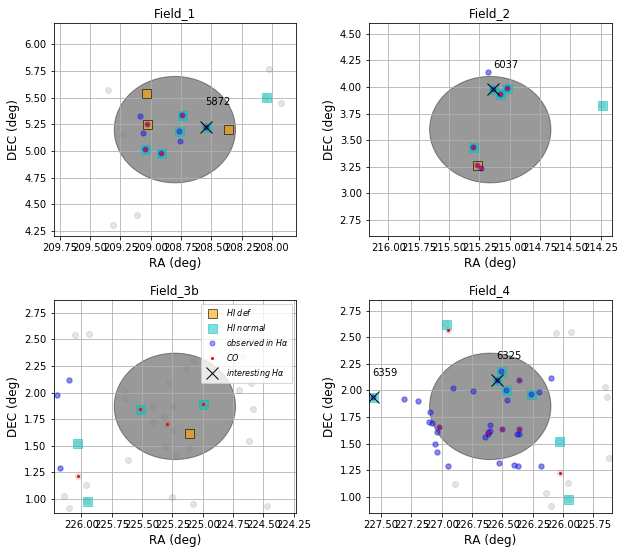

In [231]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(bottom=.2,wspace=.3,hspace=.3)

#HIdef_flag = v.a100['HIdef_bos'] > 0.5
HIdef_flag = v.a100['HIdef_bytype'] > 0.5
for k,m in enumerate(meerkat):
    plt.subplot(2,2,k+1)
    ax = plt.gca()
    circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='k',alpha=.4,label='Meerkat' )
    ax.add_artist(circ)
    
    flag = (v.fil['filament'] == 'VirgoIII_Filament') #& (v.fil['filament_member'])
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='.5',alpha=.2)

    #A100 sources, HI def
    flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['A100flag']) & HIdef_flag
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ks',color='orange',mec='k',alpha=.6,markersize=9,label=r'$HI \ def$')
    #A100 sources, HI normal
    flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['A100flag']) & ~HIdef_flag
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ks',color='c',alpha=.5,markersize=9,label=r'$HI \ normal$')
    # Halpha sources
    flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['HAobsflag'])
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='b',alpha=.4,markersize=5,label=r'$observed \  in \ H\alpha$')

    # CO sources
    flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['COflag'])
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='r',alpha=1,markersize=2,label=r'$CO$')


    # mark objects with interesting Halpha

    ids = ['VFID6325','VFID6125','VFID6478','VFID6359','VFID6147','VFID6037','VFID5872']

    for j,i in enumerate(ids):
        flag = v.main['VFID'] == i
        if j == 0:
            plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kx',markersize=12,label=r'$interesting \ H\alpha$')
        else:
            plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kx',markersize=12)
        ra = v.main['RA'][flag]
        dec = v.main['DEC'][flag]
        textflag = (ra > m.ra.value-1) & (ra < m.ra.value+1) & (dec > m.dec.value -1) & (dec < m.dec.value+1)
        if textflag:
            plt.text(v.main['RA'][flag],v.main['DEC'][flag]+.2,i.replace('VFID',''))
    plt.ylim(0,8)
    plt.axis([m.ra.value-1,m.ra.value+1,m.dec.value-1,m.dec.value+1])
    #plt.axis('equal')

    ax.invert_xaxis()
    if k == 2:
        plt.legend(fontsize=8)
    plt.title(titles[k],fontsize=12)
    #plt.ylim(0,6)
    plt.xlabel('RA (deg)',fontsize=12)
    plt.ylabel('DEC (deg)',fontsize=12)
    x1,x2 = plt.xlim()
    #plt.xticks(np.arange(x1,x2+.2,.1))
    plt.grid()
    
os.chdir(plotdir)
plt.savefig('virgoIII-meerkat-individuals.png')

In [233]:
ra = v.main['RA'][v.main['VFID'] == 'VFID6147']+.1
dec =  v.main['DEC'][v.main['VFID'] == 'VFID6147']+.15
altcoords = [SkyCoord(ra,dec,unit=u.deg,frame='icrs')]
titles=['Field_alt']
print(ra)
print(dec)

     RA    
-----------
217.6046995
   DEC   
---------
3.3704927


/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


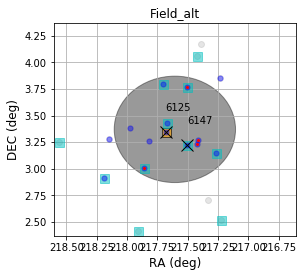

In [234]:
# alt pointings
plt.figure(figsize=(10,10))
plt.subplots_adjust(bottom=.2,wspace=.3,hspace=.3)

for k,m in enumerate(altcoords):
    plt.subplot(2,2,k+1)
    ax = plt.gca()
    circ=plt.Circle((m.ra.value,m.dec.value), 0.5,color='k',alpha=.4,label='Meerkat' )
    ax.add_artist(circ)
    
    HIdef_flag = v.a100['HIdef_bos'] > 0.5
    flag = (v.fil['filament'] == 'VirgoIII_Filament') #& (v.fil['filament_member'])
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='.5',alpha=.2)

    #A100 sources, HI def
    flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['A100flag']) & HIdef_flag
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ks',color='orange',mec='k',alpha=.6,markersize=9,label=r'$HI \ def$')
    #A100 sources, HI normal
    flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['A100flag']) & ~HIdef_flag
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ks',color='c',alpha=.5,markersize=9,label=r'$HI \ normal$')
    # Halpha sources
    flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['HAobsflag'])
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='b',alpha=.4,markersize=5,label=r'$observed \  in \ H\alpha$')

    # CO sources
    flag = (v.fil['filament'] == 'VirgoIII_Filament') & (v.main['COflag'])
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'ko',color='r',alpha=1,markersize=2,label=r'$CO$')


    # mark objects with interesting Halpha

    ids = ['VFID6325','VFID6125','VFID6478','VFID6359','VFID6147','VFID6037']

    for j,i in enumerate(ids):
        flag = v.main['VFID'] == i
        if j == 0:
            plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kx',markersize=12,label=r'$interesting \ H\alpha$')
        else:
            plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'kx',markersize=12)
        ra = v.main['RA'][flag]
        dec = v.main['DEC'][flag]
        textflag = (ra > m.ra.value-1) & (ra < m.ra.value+1) & (dec > m.dec.value -1) & (dec < m.dec.value+1)
        if textflag:
            plt.text(v.main['RA'][flag],v.main['DEC'][flag]+.2,i.replace('VFID',''))
    plt.ylim(0,8)
    plt.axis([m.ra.value-1,m.ra.value+1,m.dec.value-1,m.dec.value+1])
    #plt.axis('equal')

    ax.invert_xaxis()
    if k == 2:
        plt.legend(fontsize=8)
    plt.title(titles[k],fontsize=12)
    #plt.ylim(0,6)
    plt.xlabel('RA (deg)',fontsize=12)
    plt.ylabel('DEC (deg)',fontsize=12)
    x1,x2 = plt.xlim()
    #plt.xticks(np.arange(x1,x2+.25,.5))
    plt.grid()
    
os.chdir(plotdir)
plt.savefig('virgoIII-meerkat-alt.png')

In [235]:
dist = np.sqrt((v.main['RA']-ra)**2+(v.main['DEC']-dec)**2)
flag = (dist < 1) & v.main['COflag']
print(v.main['VFID'][flag])

  VFID  
--------
VFID6035
VFID6050
VFID6108
VFID6137
VFID6141


/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rfinn/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_e

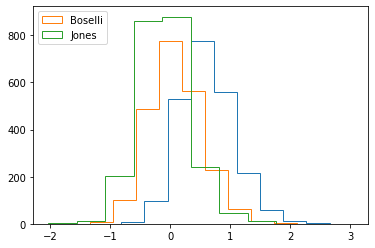

In [164]:
plt.figure()
t = plt.hist(v.a100['HIdef'][v.main['A100flag']],histtype='step')
t = plt.hist(v.a100['HIdef_bos'][v.main['A100flag']],label='Boselli',histtype='step')
t = plt.hist(v.a100['HIdef_jon'][v.main['A100flag']],label='Jones',histtype='step')
plt.legend()

In [ ]:

flag = []